In [2]:
#Graphs Of Rate Changes For Various Algorithms And Differeing Parameters In Read Until Simulator
#modules to make graphs
library("ggplot2")
library("gridExtra")
library("plyr")
library("rgl")
#needed for x axis
number_ticks <- function(n) {function(limits) pretty(limits, n)}

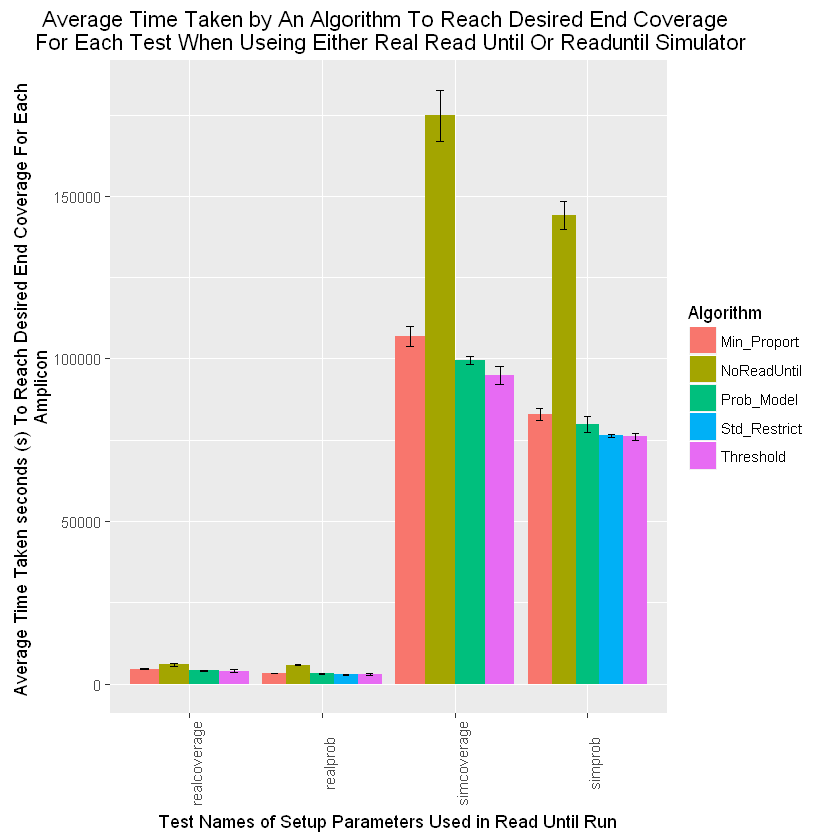

In [7]:
#Comparison of read until simulator Read_Until_Simulatar.py aReadUntil.py

#import log file to get times covert codes
realprob = read.csv("./counts/realprob_count", header = TRUE, sep=",",stringsAsFactors=FALSE)
realprob[realprob == "NR" ] = "NoReadUntil"
realprob[realprob == "b" ] = "Min_Proport"
realprob[realprob == "T" ] = "Threshold"
realprob[realprob == "P" ] = "Prob_Model"
realprob[realprob == "std" ] = "Std_Restrict"


#import log file to get times covert codes
simprob = read.csv("./counts/simprob_count", header = TRUE, sep=",",stringsAsFactors=FALSE)
simprob[simprob == "NR" ] = "NoReadUntil"
simprob[simprob == "b" ] = "Min_Proport"
simprob[simprob == "T" ] = "Threshold"
simprob[simprob == "P" ] = "Prob_Model"
simprob[simprob == "std" ] = "Std_Restrict"


#import log file to get times covert codes
realcoverage = read.csv("./counts/realcoverage_count", header = TRUE, sep=",",stringsAsFactors=FALSE)
realcoverage[realcoverage == "NR" ] = "NoReadUntil"
realcoverage[realcoverage == "b" ] = "Min_Proport"
realcoverage[realcoverage == "T" ] = "Threshold"
realcoverage[realcoverage == "P" ] = "Prob_Model"
realcoverage[realcoverage == "std" ] = "Std_Restrict"

#import log file to get times covert codes
simcoverage = read.csv("./counts/simcoverage_count", header = TRUE, sep=",",stringsAsFactors=FALSE)
simcoverage[simcoverage == "NR" ] = "NoReadUntil"
simcoverage[simcoverage == "b" ] = "Min_Proport"
simcoverage[simcoverage == "T" ] = "Threshold"
simcoverage[simcoverage == "P" ] = "Prob_Model"
simcoverage[simcoverage == "std" ] = "Std_Restrict"

#add labels for master
realcoverage["Test"] = "realcoverage"
simcoverage["Test"] = "simcoverage"
realprob["Test"] = "realprob"
simprob["Test"] = "simprob"


master_avg_rates = rbind(realcoverage,simcoverage,realprob,simprob)

tested = c("simcoverage","realprob","simprob","realcoverage")
algors = c("NoReadUntil","Prob_Model","Threshold","Min_Proport","Std_Restrict")

avgtotal= data.frame( AvgTime = numeric(0), Algorithm = character(0), Test =character(0), SD =numeric(0), stringsAsFactors=FALSE)

#make mean table 
for (x in algors){
    for (y in tested){
        if (is.nan(with(master_avg_rates ,mean(Time[Algorithm == x & Test == y]))) == FALSE){
            mean = as.integer(with(master_avg_rates,mean(Time[Algorithm == x & Test == y])))
            SD = as.integer(with(master_avg_rates,sd(Time[Algorithm == x & Test == y])))
            avgtotal[nrow(avgtotal) + 1, ] <- c(mean,x,y,SD)
            }
    }
} 

avgtotal = transform(avgtotal, AvgTime = as.numeric(AvgTime))
avgtotal = transform(avgtotal, SD = as.numeric(SD))

#plot overall graph of time taken comparing bewtween experiments
ggplot(avgtotal,aes(Test,AvgTime, fill=Algorithm)) + 
geom_bar(stat= "identity", position= "dodge") +   
geom_errorbar(aes(ymin=AvgTime-SD, ymax=AvgTime+SD), position=position_dodge(width=0.9), width=0.25) +
theme(axis.text.x=element_text(angle=90))+
ylab("Average Time Taken seconds (s) To Reach Desired End Coverage For Each \nAmplicon") + xlab("Test Names of Setup Parameters Used in Read Until Run") + 
ggtitle("Average Time Taken by An Algorithm To Reach Desired End Coverage \n For Each Test When Useing Either Real Read Until Or Readuntil Simulator")




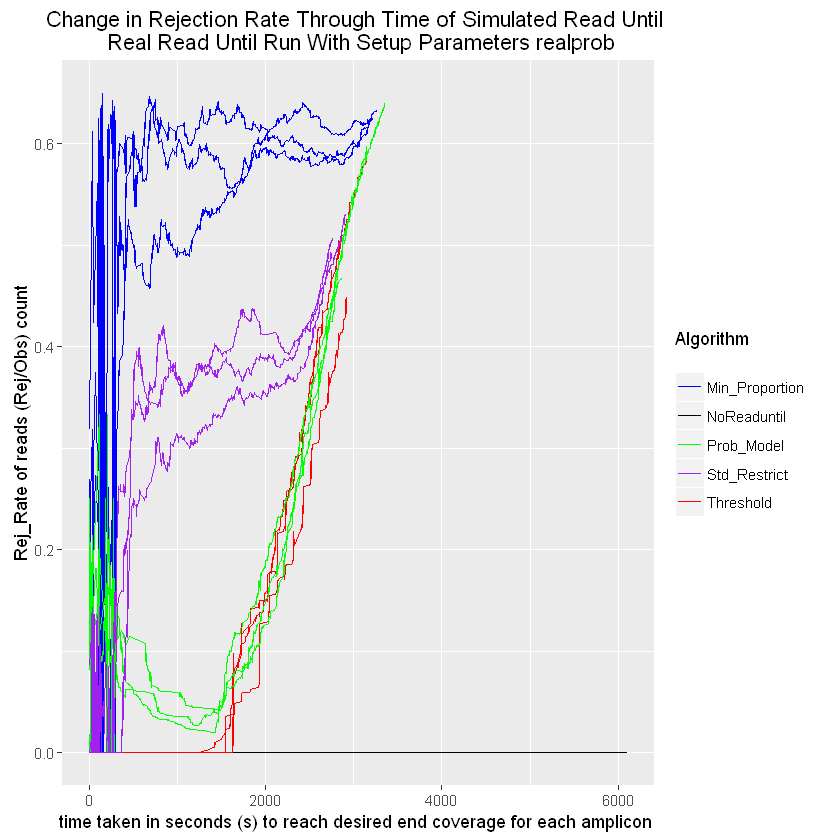

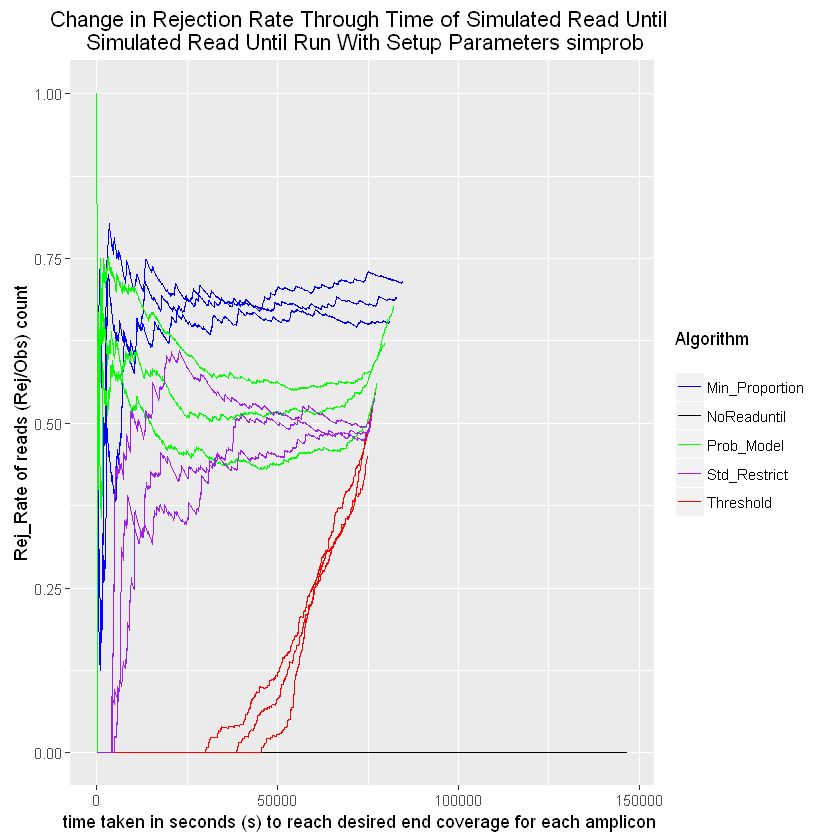

In [12]:
#Useing real read until and with varition in the amplicon abundances
name = "realprob"

rates_NR1 = read.csv(paste("./rates/NR1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR2 = read.csv(paste("./rates/NR2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR3 = read.csv(paste("./rates/NR3_rates_",name,".txt",sep=""), header = TRUE, sep=",")


#Prob model
rates_P1 = read.csv(paste("./rates/P1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P2 = read.csv(paste("./rates/P2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P3 = read.csv(paste("./rates/P3_rates_",name,".txt",sep=""), header = TRUE, sep=",")

#Threshold
rates_T1 = read.csv(paste("./rates/T1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T2 = read.csv(paste("./rates/T2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T3 = read.csv(paste("./rates/T3_rates_",name,".txt",sep=""), header = TRUE, sep=",")


#Minproportion
rates_1b1 = read.csv(paste("./rates/1b1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b2 = read.csv(paste("./rates/1b2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b3 = read.csv(paste("./rates/1b3_rates_",name,".txt",sep=""), header = TRUE, sep=",")

#std restrict 
rates_std_res1 = read.csv(paste("./rates/std_res1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res2 = read.csv(paste("./rates/std_res2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res3 = read.csv(paste("./rates/std_res3_rates_",name,".txt",sep=""), header = TRUE, sep=",")

#lineplot
Fig1 <- ggplot()+
geom_line(data=rates_NR1, aes(x=Time, y=RejRate, color='NoReaduntil'))+ 
geom_line(data=rates_NR2, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_NR3, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_T1, aes(x=Time, y=RejRate, color='Threshold'))+ 
geom_line(data=rates_T2, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_T3, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_1b1, aes(x=Time, y=RejRate, color='Min_Proportion'))+ 
geom_line(data=rates_1b2, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_1b3, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_P1, aes(x=Time, y=RejRate, color='Prob_Model'))+ 
geom_line(data=rates_P2, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_P3, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_std_res1, aes(x=Time, y=RejRate, color='Std_Restrict'))+ 
geom_line(data=rates_std_res2, aes(x=Time, y=RejRate, color='Std_Restrict'))+
geom_line(data=rates_std_res3, aes(x=Time, y=RejRate, color='Std_Restrict'))+
labs(title = "Change in Rejection Rate Through Time of Simulated Read Until \n Real Read Until Run With Setup Parameters realprob"
,color = "Algorithm\n")+
ylab("Rej_Rate of reads (Rej/Obs) count")+xlab("time taken in seconds (s) to reach desired end coverage for each amplicon ")+
scale_color_manual(values=c("NoReaduntil"="black", "Threshold"="Red","Min_Proportion"="blue", "Prob_Model"="green", "Std_Restrict"="purple"))
Fig1

#Useing simulated read until and with varition in the amplicon abundances
name = "simprob"
rates_NR1 = read.csv(paste("./rates/NR1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR2 = read.csv(paste("./rates/NR2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR3 = read.csv(paste("./rates/NR3_rates_",name,".txt",sep=""), header = TRUE, sep=",")

#Prob model
rates_P1 = read.csv(paste("./rates/P1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P2 = read.csv(paste("./rates/P2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P3 = read.csv(paste("./rates/P3_rates_",name,".txt",sep=""), header = TRUE, sep=",")

#Threshold
rates_T1 = read.csv(paste("./rates/T1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T2 = read.csv(paste("./rates/T2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T3 = read.csv(paste("./rates/T3_rates_",name,".txt",sep=""), header = TRUE, sep=",")

#Minproportion
rates_1b1 = read.csv(paste("./rates/1b1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b2 = read.csv(paste("./rates/1b2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b3 = read.csv(paste("./rates/1b3_rates_",name,".txt",sep=""), header = TRUE, sep=",")

#std restrict 
rates_std_res1 = read.csv(paste("./rates/std_res1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res2 = read.csv(paste("./rates/std_res2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_std_res3 = read.csv(paste("./rates/std_res3_rates_",name,".txt",sep=""), header = TRUE, sep=",")

#lineplot
Fig2 <- ggplot()+
geom_line(data=rates_NR1, aes(x=Time, y=RejRate, color='NoReaduntil'))+ 
geom_line(data=rates_NR2, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_NR3, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_T1, aes(x=Time, y=RejRate, color='Threshold'))+ 
geom_line(data=rates_T2, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_T3, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_1b1, aes(x=Time, y=RejRate, color='Min_Proportion'))+ 
geom_line(data=rates_1b2, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_1b3, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_P1, aes(x=Time, y=RejRate, color='Prob_Model'))+ 
geom_line(data=rates_P2, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_P3, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_std_res1, aes(x=Time, y=RejRate, color='Std_Restrict'))+ 
geom_line(data=rates_std_res2, aes(x=Time, y=RejRate, color='Std_Restrict'))+
geom_line(data=rates_std_res3, aes(x=Time, y=RejRate, color='Std_Restrict'))+
labs(title = "Change in Rejection Rate Through Time of Simulated Read Until \n Simulated Read Until Run With Setup Parameters simprob"
,color = "Algorithm\n")+
ylab("Rej_Rate of reads (Rej/Obs) count")+xlab("time taken in seconds (s) to reach desired end coverage for each amplicon ")+
scale_color_manual(values=c("NoReaduntil"="black", "Threshold"="Red","Min_Proportion"="blue", "Prob_Model"="green", "Std_Restrict"="purple"))
Fig2


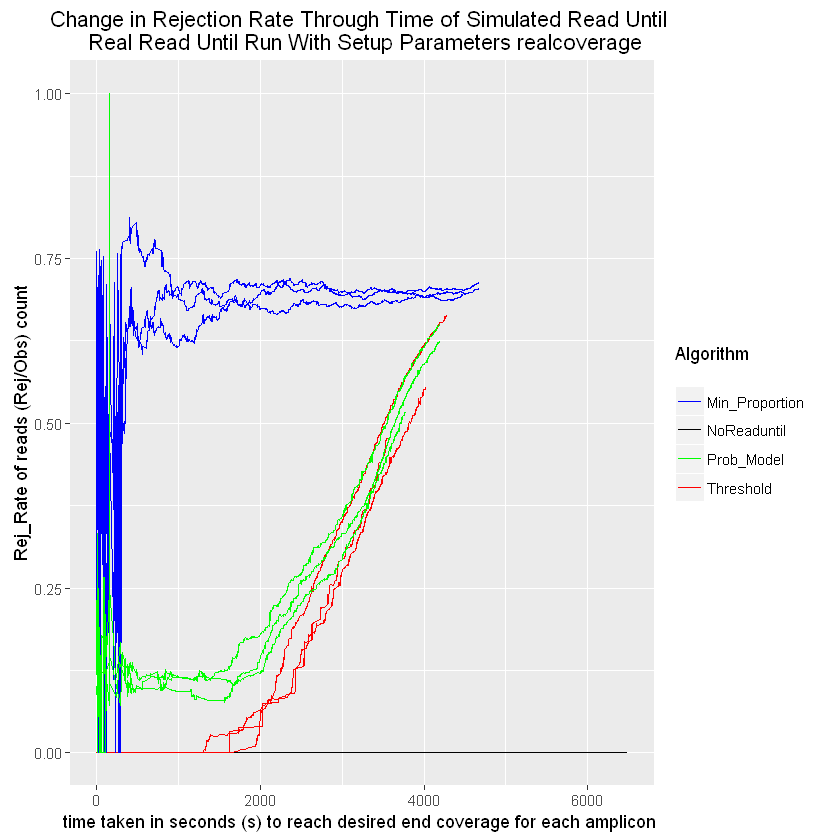

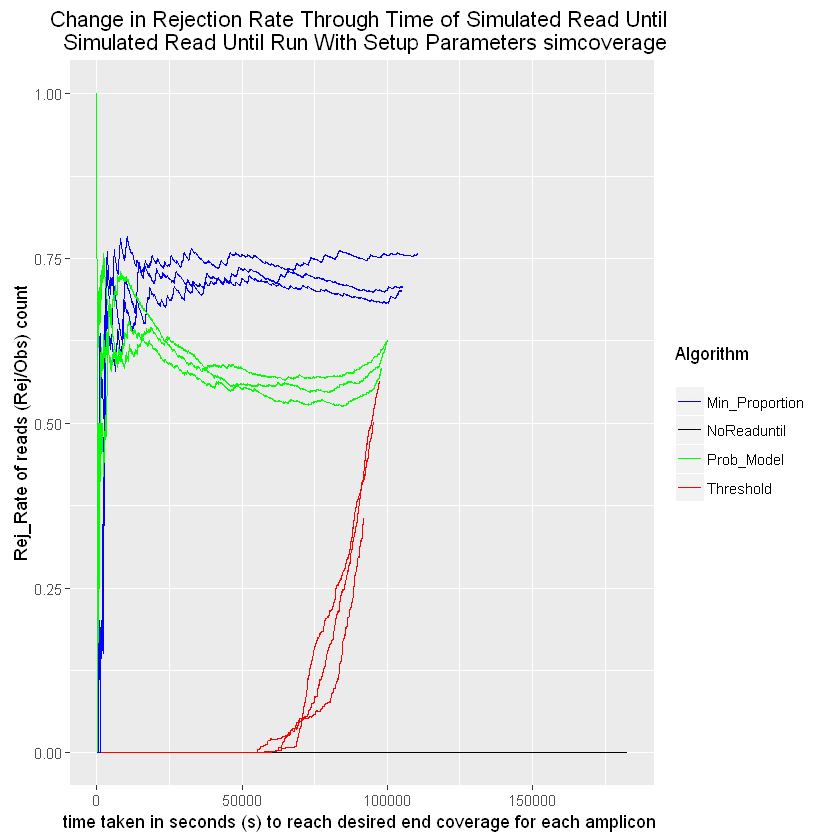

In [4]:
#Useing simulated read until and with varition in the amplicon abundances and coverages
name = "realcoverage"
#import log files containing rejection rate everytime an even occurs
#No read until runs 
rates_NR1 = read.csv(paste("./rates/NR1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR2 = read.csv(paste("./rates/NR2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR3 = read.csv(paste("./rates/NR3_rates_",name,".txt",sep=""), header = TRUE, sep=",")

#Prob model
rates_P1 = read.csv(paste("./rates/P1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P2 = read.csv(paste("./rates/P2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P3 = read.csv(paste("./rates/P3_rates_",name,".txt",sep=""), header = TRUE, sep=",")

#Threshold
rates_T1 = read.csv(paste("./rates/T1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T2 = read.csv(paste("./rates/T2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T3 = read.csv(paste("./rates/T3_rates_",name,".txt",sep=""), header = TRUE, sep=",")

#Minproportion
rates_1b1 = read.csv(paste("./rates/1b1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b2 = read.csv(paste("./rates/1b2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b3 = read.csv(paste("./rates/1b3_rates_",name,".txt",sep=""), header = TRUE, sep=",")


#lineplot
Fig3 <- ggplot()+
geom_line(data=rates_NR1, aes(x=Time, y=RejRate, color='NoReaduntil'))+ 
geom_line(data=rates_NR2, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_NR3, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_T1, aes(x=Time, y=RejRate, color='Threshold'))+ 
geom_line(data=rates_T2, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_T3, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_1b1, aes(x=Time, y=RejRate, color='Min_Proportion'))+ 
geom_line(data=rates_1b2, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_1b3, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_P1, aes(x=Time, y=RejRate, color='Prob_Model'))+ 
geom_line(data=rates_P2, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_P3, aes(x=Time, y=RejRate, color='Prob_Model'))+
labs(title = "Change in Rejection Rate Through Time of Simulated Read Until \n Real Read Until Run With Setup Parameters realcoverage"
,color = "Algorithm\n")+
ylab("Rej_Rate of reads (Rej/Obs) count")+xlab("time taken in seconds (s) to reach desired end coverage for each amplicon ")+
scale_color_manual(values=c("NoReaduntil"="black", "Threshold"="Red","Min_Proportion"="blue", "Prob_Model"="green", "Std_Restrict"="purple"))
Fig3


name = "simcoverage"
#import log files containing rejection rate everytime an even occurs
#No read until runs 
rates_NR1 = read.csv(paste("./rates/NR1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR2 = read.csv(paste("./rates/NR2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_NR3 = read.csv(paste("./rates/NR3_rates_",name,".txt",sep=""), header = TRUE, sep=",")

#Prob model
rates_P1 = read.csv(paste("./rates/P1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P2 = read.csv(paste("./rates/P2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_P3 = read.csv(paste("./rates/P3_rates_",name,".txt",sep=""), header = TRUE, sep=",")

#Threshold
rates_T1 = read.csv(paste("./rates/T1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T2 = read.csv(paste("./rates/T2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_T3 = read.csv(paste("./rates/T3_rates_",name,".txt",sep=""), header = TRUE, sep=",")

#Minproportion
rates_1b1 = read.csv(paste("./rates/1b1_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b2 = read.csv(paste("./rates/1b2_rates_",name,".txt",sep=""), header = TRUE, sep=",")
rates_1b3 = read.csv(paste("./rates/1b3_rates_",name,".txt",sep=""), header = TRUE, sep=",")

#lineplot
Fig4 <- ggplot()+
geom_line(data=rates_NR1, aes(x=Time, y=RejRate, color='NoReaduntil'))+ 
geom_line(data=rates_NR2, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_NR3, aes(x=Time, y=RejRate, color='NoReaduntil'))+
geom_line(data=rates_T1, aes(x=Time, y=RejRate, color='Threshold'))+ 
geom_line(data=rates_T2, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_T3, aes(x=Time, y=RejRate, color='Threshold'))+
geom_line(data=rates_1b1, aes(x=Time, y=RejRate, color='Min_Proportion'))+ 
geom_line(data=rates_1b2, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_1b3, aes(x=Time, y=RejRate, color='Min_Proportion'))+
geom_line(data=rates_P1, aes(x=Time, y=RejRate, color='Prob_Model'))+ 
geom_line(data=rates_P2, aes(x=Time, y=RejRate, color='Prob_Model'))+
geom_line(data=rates_P3, aes(x=Time, y=RejRate, color='Prob_Model'))+
labs(title = "Change in Rejection Rate Through Time of Simulated Read Until \n Simulated Read Until Run With Setup Parameters simcoverage"
,color = "Algorithm\n")+
ylab("Rej_Rate of reads (Rej/Obs) count")+xlab("time taken in seconds (s) to reach desired end coverage for each amplicon ")+
scale_color_manual(values=c("NoReaduntil"="black", "Threshold"="Red","Min_Proportion"="blue", "Prob_Model"="green", "Std_Restrict"="purple"))
Fig4
